In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("customers.csv")
print("Dataset Loaded Successfully\n")
print(df.head())

Dataset Loaded Successfully

  CustomerID  Age Gender       City  AnnualIncome  TotalSpent  \
0       C001   28      F  Bangalore      450000.0      120000   
1       C002   35      M     Mumbai     1200000.0      850000   
2       C003   42      F      Delhi      300000.0       75000   
3       C004   26      M       Pune           NaN       40000   
4       C005   39      F  Bangalore      950000.0      600000   

   MonthlyPurchases  AvgOrderValue  AppTimeMinutes DiscountUsage  \
0                 6           2000            45.0        Medium   
1                18          12000           120.0           Low   
2                 3           1800            30.0          High   
3                 2           1500            20.0          High   
4                15           9000            95.0           Low   

  PreferredShoppingTime  
0                 Night  
1                 Night  
2                   Day  
3                   Day  
4                 Night  


In [138]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = [
    "Gender",
    "City",
    "DiscountUsage",
    "PreferredShoppingTime"
]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [111]:
outlier_cols = [
    "AnnualIncome",
    "TotalSpent",
    "MonthlyPurchases",
    "AvgOrderValue",
    "AppTimeMinutes"
]
 
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
 
outliers = ((df[outlier_cols] < (Q1 - 1.5 * IQR)) |
            (df[outlier_cols] > (Q3 + 1.5 * IQR)))
df_clean = df[~outliers. any(axis=1)]


In [139]:
numeric_cols = [
    "Age", "AnnualIncome", "TotalSpent", 
    "MonthlyPurchases", "AvgOrderValue", "AppTimeMinutes", "DiscountUsage"
]

X = df_clean[numeric_cols]  # use df_clean after removing outliers
X = X.fillna(X.median())

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7392\1418414006.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Cluster"] = kmeans.fit_predict(X_scaled)


In [140]:
le_gender = LabelEncoder()
le_city = LabelEncoder()
le_discount = LabelEncoder()
le_time = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['City'] = le_city.fit_transform(df['City'])
df['DiscountUsage'] = le_discount.fit_transform(df['DiscountUsage'])
df['PreferredShoppingTime'] = le_time.fit_transform(df['PreferredShoppingTime'])
print("\nEncoded Data:")
print(df.head())


Encoded Data:
  CustomerID  Age  Gender  City  AnnualIncome  TotalSpent  MonthlyPurchases  \
0       C001   28       0     0      450000.0      120000                 6   
1       C002   35       1     5     1200000.0      850000                18   
2       C003   42       0     2      300000.0       75000                 3   
3       C004   26       1     6           NaN       40000                 2   
4       C005   39       0     0      950000.0      600000                15   

   AvgOrderValue  AppTimeMinutes  DiscountUsage  PreferredShoppingTime  
0           2000            45.0              2                      1  
1          12000           120.0              1                      1  
2           1800            30.0              0                      0  
3           1500            20.0              0                      0  
4           9000            95.0              1                      1  


In [141]:
X = df[['Age','AnnualIncome','TotalSpent','MonthlyPurchases',
        'AvgOrderValue','AppTimeMinutes','DiscountUsage','PreferredShoppingTime']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeature Scaling Completed")


Feature Scaling Completed


In [142]:
cluster_labels = {
    0: "High-Value Loyal Customers",
    1: "Value-Seeking Regular Customers",
    2: "Price-Sensitive Occasional Customers"
}

df_clean["Customer Segment"] = df_clean["Cluster"].map(cluster_labels)
df.to_csv("customer_segments.csv", index=False)
print("\nCustomer segments saved to 'customer_segments.csv'")




Customer segments saved to 'customer_segments.csv'


C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7392\1425928758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Customer Segment"] = df_clean["Cluster"].map(cluster_labels)


In [143]:
offers = {
    "High-Value Loyal Customers": 
        "Exclusive early access to new products + Premium membership with free express delivery",

    "Value-Seeking Regular Customers": 
        "Festival discounts (10–15%) + Loyalty reward points",

    "Price-Sensitive Occasional Customers": 
        "Flash sales, coupons, and free shipping on minimum order"
}

df_clean["Recommended Offer"] = df_clean["Customer Segment"].map(offers)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7392\3177982708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Recommended Offer"] = df_clean["Customer Segment"].map(offers)


In [144]:
cluster_counts = df_clean['Cluster'].value_counts()
largest_cluster = cluster_counts.idxmax()
mapping = {largest_cluster: 1}
remaining_clusters = [c for c in cluster_counts.index if c != largest_cluster]
mapping[remaining_clusters[0]] = 0
mapping[remaining_clusters[1]] = 2
df_clean['Cluster'] = df_clean['Cluster'].map(mapping)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_7392\3536283517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = df_clean['Cluster'].map(mapping)


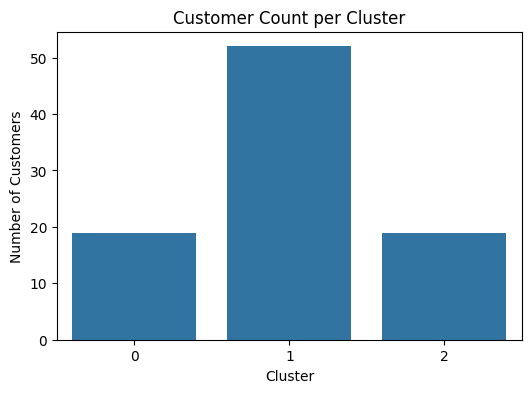

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=df_clean)
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

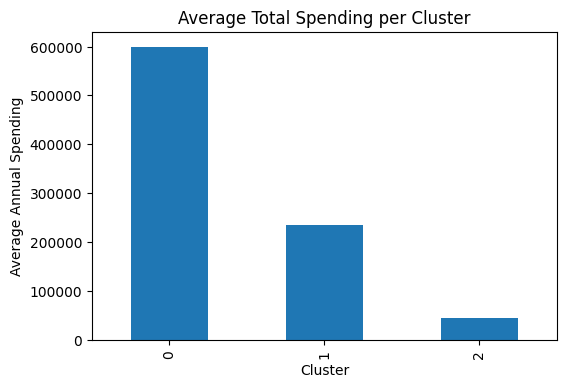

In [146]:
avg_spending = df_clean.groupby("Cluster")["TotalSpent"].median()

plt.figure(figsize=(6,4))
avg_spending.plot(kind="bar")
plt.title("Average Total Spending per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Annual Spending")
plt.show()

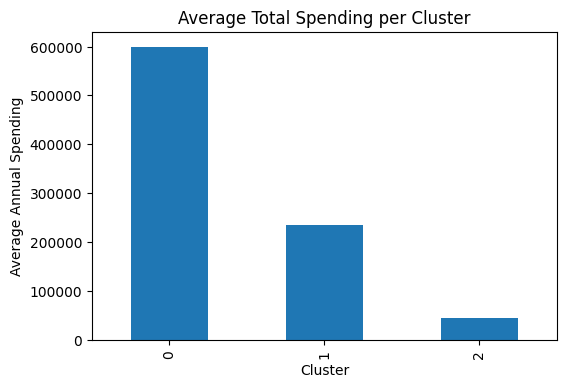

In [147]:
avg_spending = df_clean.groupby("Cluster")["TotalSpent"].median()

plt.figure(figsize=(6,4))
avg_spending.plot(kind="bar")
plt.title("Average Total Spending per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Annual Spending")
plt.show()

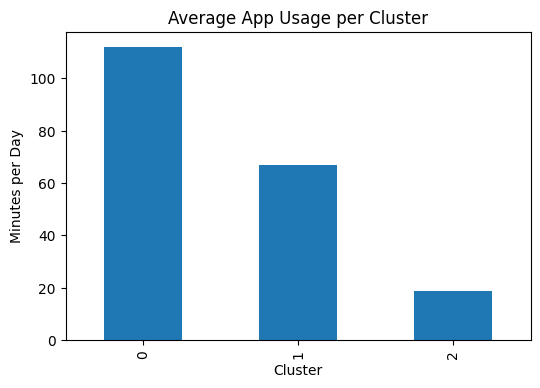

In [148]:
avg_app_usage = df_clean.groupby("Cluster")[
    "AppTimeMinutes"
].mean()

plt.figure(figsize=(6,4))
avg_app_usage.plot(kind="bar")
plt.title("Average App Usage per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Minutes per Day")
plt.show()

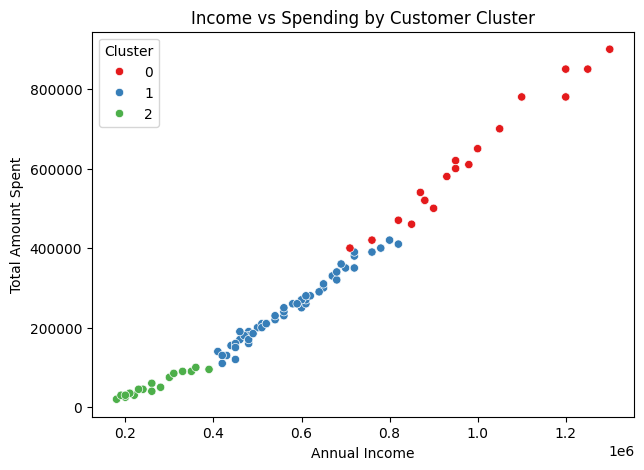

In [149]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="AnnualIncome",
    y="TotalSpent",
    hue="Cluster",
    data=df_clean,
    palette="Set1"
)

plt.title("Income vs Spending by Customer Cluster")
plt.xlabel("Annual Income")
plt.ylabel("Total Amount Spent")
plt.show()

In [151]:
import pickle

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save kmeans
with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save label encoders
label_encoders = {
    "Gender": le_gender,
    "City": le_city,
    "DiscountUsage": le_discount,
    "PreferredShoppingTime": le_time
}

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("All models saved as .pkl files!")


All models saved as .pkl files!
